# Correr experimentos
En este archivo está el código para correr los experimentos y escribir los resultados en archivos CSV.
> Los archivos se guardan en la carpeta _resultados_.

In [44]:
import math, subprocess
import pandas as pd
import numpy as np
import random, math
import os
from IPython.display import display, clear_output, update_display
import time
import matplotlib.pyplot as plt
from math import floor

eps = 10e-15
alpha = 10e7
experimentos = []

In [45]:
%run algoritmos.ipynb

/tmp/ipykernel_6974/3469964432.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/tmp/ipykernel_6974/559068186.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/tmp/ipykernel_6974/2877216679.py:1: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is 

## Métodos de Eliminación Gausseana
- eliminacion_gausseana_SP
- eliminacion_gausseana_CP
- eliminacion_gausseana_TR_SinPre
- eliminacion_gausseana_TR_Pre

In [46]:
# Lectura de Matriz
def leer_matriz(path_instancia):
    A = np.loadtxt(path_instancia)
    return A

In [47]:
def agregar_experimentos(dataframe):
    counter = 0
    while counter < len(dataframe):
        fila = dataframe.iloc[counter]
        experimentos.append([fila["dataset"], fila["archivo-A"], fila["archivo-b"], fila["n"], fila["notas"]])
        counter = counter + 1

In [48]:
def agregar_experimentos_A(dataframe):
    counter = 0
    while counter < len(dataframe):
        fila = dataframe.iloc[counter]
        experimentos_A.append([fila["dataset"], fila["archivo"], fila["n"]])
        counter = counter + 1

In [49]:
def agregar_experimentos_b(dataframe):
    counter = 0
    while counter < len(dataframe):
        fila = dataframe.iloc[counter]
        experimentos_b.append([fila["dataset"], fila["archivo"], fila["n"]])
        counter = counter + 1

### Pruebas de Algoritmos
- Pruebas con EG
- Pruebas con EG Pivoteo
- Pruebas con Tridiagonal

In [50]:
dfs={}
casos=["tr_pruebas_sin_pivot"]
experimentos = []
for caso in casos:
    dfs[caso]=pd.read_csv(F"instancias/{caso}/indice.csv")

for caso in casos:
    agregar_experimentos(dfs[caso])
    
if(not os.path.isdir("resultados")):
    os.mkdir("resultados")
filas = []

for i in range(0, len(experimentos)):
    experimento = experimentos[i]
    
    # Ejecutamos el experimento T veces y obtenemos la mediana.
    pathA = F"instancias/{experimento[0]}/{experimento[1]}"
    pathB = F"instancias/{experimento[0]}/{experimento[2]}"
    A = leer_matriz(pathA)
    b = leer_matriz(pathB)
        
    print(F"Matriz {i} - {experimento[4]}")
    print(A)
    EG_Pivot = eliminacion_gaussiana_CP(A, b)
    print(F"Matriz luego de la eliminación:")
    print(A)
    print(f"Resultado:")
    print(EG_Pivot)
    print("\n")

Matriz 0 - Matriz Normal Sin Triangular
[[  1.   2.   3.   4.]
 [  1.   4.   9.  16.]
 [  1.   8.  27.  64.]
 [  1.  16.  81. 256.]]


/tmp/ipykernel_6974/572586751.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "eliminacion_gaussiana_CP" failed type inference due to: Unknown attribute 'time' of type Module(<module 'time' (built-in)>)

File "../../../../../../../tmp/ipykernel_6974/572586751.py", line 5:
<source missing, REPL/exec in use?>

During: typing of get attribute at /tmp/ipykernel_6974/572586751.py (5)

File "../../../../../../../tmp/ipykernel_6974/572586751.py", line 5:
<source missing, REPL/exec in use?>

  @jit
/tmp/ipykernel_6974/572586751.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "eliminacion_gaussiana_CP" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../../../../../../../tmp/ipykernel_6974/572586751.py", line 7:
<source missing, REPL/exec in use?>

  @jit
/home/matias/.local/lib/python3.11/site-packages/numba/core/ob

Matriz luego de la eliminación:
[[  1.   2.   3.   4.]
 [  1.   4.   9.  16.]
 [  1.   8.  27.  64.]
 [  1.  16.  81. 256.]]
Resultado:
[array([-1.,  1., -1.,  1.]), 1.0797219276428223]


Matriz 1 - Matriz Normal Sin Triangular
[[ 2.  1. -1.  3.]
 [-2.  0.  0.  0.]
 [ 4.  1. -2.  4.]
 [-6. -1.  2. -3.]]
Matriz luego de la eliminación:
[[ 2.  1. -1.  3.]
 [-2.  0.  0.  0.]
 [ 4.  1. -2.  4.]
 [-6. -1.  2. -3.]]
Resultado:
[array([  1., -30.,   7.,  16.]), 6.67572021484375e-06]


Matriz 2 - Matriz Triangulada
[[ 2.  1. -1.  3.]
 [ 0.  1. -1.  3.]
 [ 0.  0. -1.  1.]
 [ 0.  0.  0.  1.]]
Matriz luego de la eliminación:
[[ 2.  1. -1.  3.]
 [ 0.  1. -1.  3.]
 [ 0.  0. -1.  1.]
 [ 0.  0.  0.  1.]]
Resultado:
[array([  1., -16.,   0.,   9.]), 5.4836273193359375e-06]


Matriz 3 - Matriz Con Decimales Chicos sin Triangular
[[ 2.e-07  1.e+00 -1.e+00  3.e+00]
 [-2.e-07  0.e+00  0.e+00  0.e+00]
 [ 4.e-07  1.e+00 -2.e+00  4.e+00]
 [-6.e-07 -1.e+00  2.e+00 -3.e+00]]
Division por numero cercano a 0 pue

In [51]:
dfs={}
casos=["tr_pruebas_pivot"]
experimentos = []
for caso in casos:
    dfs[caso]=pd.read_csv(F"instancias/{caso}/indice.csv")

for caso in casos:
    agregar_experimentos(dfs[caso])
    
if(not os.path.isdir("resultados")):
    os.mkdir("resultados")
filas = []

for i in range(0, len(experimentos)):
    experimento = experimentos[i]
    
    # Ejecutamos el experimento T veces y obtenemos la mediana.
    pathA = F"instancias/{experimento[0]}/{experimento[1]}"
    pathB = F"instancias/{experimento[0]}/{experimento[2]}"
    A = leer_matriz(pathA)
    b = leer_matriz(pathB)
        
    print(F"Matriz {i} - {experimento[4]}")
    print(A)
    EG_Pivot = eliminacion_gaussiana_CP(A, b)
    print(F"Matriz luego de la eliminación:")
    print(A)
    print(f"Resultado:")
    print(EG_Pivot[0])
    print("\n")

Matriz 0 - Matriz Permutada
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
Matriz luego de la eliminación:
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
Resultado:
[2. 1. 3. 5. 6. 4.]


Matriz 1 - Solucion: x1: 10.00 x2: 1.000
[[ 3.000e-03  5.914e+01]
 [ 5.291e+00 -6.130e+00]]
Matriz luego de la eliminación:
[[ 3.000e-03  5.914e+01]
 [ 5.291e+00 -6.130e+00]]
Resultado:
[10.  1.]


Matriz 2 - Solucion: x1: -10.00 x2: 1.001
[[ 3.000e+01  5.914e+05]
 [ 5.291e+00 -6.130e+00]]
Matriz luego de la eliminación:
[[ 3.000e+01  5.914e+05]
 [ 5.291e+00 -6.130e+00]]
Resultado:
[10.  1.]


Matriz 3 - Sin Solucion
[[1. 1.]
 [2. 2.]]
Matriz luego de la eliminación:
[[1. 1.]
 [2. 2.]]
Resultado:
[2.5 0. ]


Matriz 4 - Solucion Infinita
[[1. 1.]
 [2. 2.]]
Matriz luego de la eliminación:
[[1. 1.]
 [2. 2.]]
Resultado:
[2. 0.]


Matriz 5 - Con deci

### Ejercicio 4a
Se leerán varias matrices y se las procederá a evaluar con los algoritmos:
- eliminacion_gausseana_CP
- eliminacion_gausseana_TR_SinPre

In [52]:
def construir_matriz_completa(a,b,c):
    n = len(b)
    A = np.zeros((n,n))
    for i in range(0, len(b)):
        A[i][i] = b[i]
        if i >= 1:
            A[i][i-1] = a[i]
        if i < len(b)-1:
            A[i][i+1] = c[i]
            
    return A

In [53]:
dfs={}
casos=["tr_edd", "tr_random", "tr_sdp"]
experimentos = []
metodos=["EG_PIVOT","EG_TRI"]
for caso in casos:
    dfs[caso]=pd.read_csv(F"instancias/{caso}/indice.csv")

for caso in casos:
    agregar_experimentos(dfs[caso])
    
if(not os.path.isdir("resultados")):
    os.mkdir("resultados")

In [54]:
# Experimentación con EG_Pivot y EG_Trig
columnas = ["dataset", "n", "metodo", "tiempo"];
filas = []
parametros = []
numero = 1

pathA = F"instancias/{experimentos[0][0]}/{experimentos[0][1]}"
pathB = F"instancias/{experimentos[0][0]}/{experimentos[0][2]}"
A = leer_matriz(pathA)
b = leer_matriz(pathB)
A_square = construir_matriz_completa(A[0], A[1], A[2])
EG_Pivot = eliminacion_gaussiana_CP(A_square, b)
EG_Trig = EG_tridiagonal(A[0], A[1], A[2], b)
clear_output(wait=True)
display('Experimento: ' + str(numero) + "/" + str(len(experimentos)), display_id='exp')
display('Iteracion: ', display_id='iteracion')

for experimento in experimentos:
    # Voy mostrando que experimento se esta ejecutando.
    update_display('Experimento: ' + str(numero) + "/" + str(len(experimentos)), display_id='exp')

    # Ejecutamos el experimento T veces y obtenemos la mediana.
    pathA = F"instancias/{experimento[0]}/{experimento[1]}"
    pathB = F"instancias/{experimento[0]}/{experimento[2]}"
    A = leer_matriz(pathA)
    b = leer_matriz(pathB)
    
    A_trig = A
    A_square = construir_matriz_completa(A[0], A[1], A[2])

    min_CP = 0.0
    min_SP = 0.0
    
    it = 0

    update_display('Iteracion: ' + str(it), display_id='iteracion')
    
    while(it < 100):
        EG_Trig = EG_tridiagonal(A[0], A[1], A[2], b)
        EG_Pivot = eliminacion_gaussiana_CP(A_square, b)
        
        if(EG_Pivot[1] < min_CP or min_CP == 0):
            min_CP = EG_Pivot[1]
            
        if(EG_Trig[1] != 0.0):
            if(EG_Trig[1] < min_SP or min_SP == 0.0):
                min_SP = EG_Trig[1]

        it = it + 1
        update_display('Iteracion: ' + str(it), display_id='iteracion')
        
    if(experimento[0] == "tr_edd"):
        filas.append(["EDD", len(b), "EG_Pivot", min_CP]);
        filas.append(["EDD", len(b), "EG_Tridg", min_SP]);
        
    if(experimento[0] == "tr_random"):
        filas.append(["RANDOM", len(b), "EG_Pivot", min_CP]);
        filas.append(["RANDOM", len(b), "EG_Tridg", min_SP]);
        
    if(experimento[0] == "tr_sdp"):
        filas.append(["SDP", len(b), "EG_Pivot", min_CP]);
        filas.append(["SDP", len(b), "EG_Tridg", min_SP]);     

    numero += 1
df_resultado = pd.DataFrame(filas, columns=columnas);
df_resultado.to_csv("resultados/resultado.csv", index=False, header=True);

'Experimento: 90/90'

'Iteracion: 100'

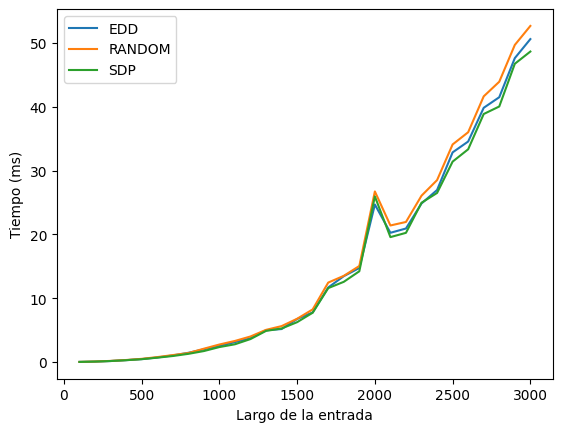

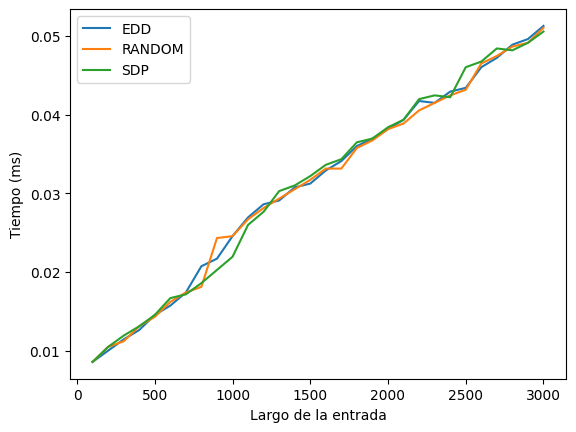

In [55]:
x = range(100, 3001, 100)

for method in ['EG_Pivot', 'EG_Tridg']:
    for dataset in ['EDD', 'RANDOM', 'SDP']:
        plt.plot(x, [fila[3] * 1000 for fila in filas if fila[0] == dataset and fila[2] == method], label=dataset)

    plt.legend()
    plt.xlabel('Largo de la entrada')
    plt.ylabel('Tiempo (ms)')
    plt.savefig(F"graficos/4a-algoritmos-{method}.svg");
    plt.show()

### Ejercicio 4b

In [56]:
dfs_A={}
dfs_b={}
casos=["tr_random_l", "tr_sdp_l", "tr_edd_l"]

experimentos_A = []
experimentos_b = []
metodos=["EG_TRI", "EG_TRI_PRE"]

for caso in casos:
    csv_data = pd.read_csv(F"instancias/{caso}/indice.csv")
    dfs_A[caso]=csv_data[csv_data["type"] == "A"].copy()
    dfs_b[caso]=csv_data[csv_data["type"] == "b"].copy()

for caso in casos:
    agregar_experimentos_A(dfs_A[caso])
    agregar_experimentos_b(dfs_b[caso])
    
if(not os.path.isdir("resultados")):
    os.mkdir("resultados")

In [74]:
columnas = ["dataset", "n", "metodo", "tiempo", "d"];
filas = []
parametros = []
numero = 1
position = 0

pathA = F"instancias/{experimentos_A[0][0]}/{experimentos_A[0][1]}"
A = leer_matriz(pathA)

a_CPre = A[0].copy()
a_SPre = A[0].copy()
pathB = F"instancias/{experimentos_b[0][0]}/{experimentos_b[0][1]}"
d = leer_matriz(pathB)

a_CPre, b_CPre, c_CPre, d_CPre = precomputo_eliminacion_gaussiana_tridiagonal(a_CPre, A[1], A[2])
EG_CPre = sustitucion_hacia_atras_con_precomputo(b_CPre, c_CPre, d_CPre, d)
EG_SPre = EG_tridiagonal(a_SPre, A[1], A[2], d)

clear_output(wait=True)

display('Experimento: ' + str(numero) + "/" + str(len(experimentos_A)), display_id='experimento')
display('d_valor: ' + str(0) +  "/" + str(1001), display_id='d_valor')

for i in range(0, len(experimentos_A)):
    experimento_a = experimentos_A[i]
    
    # Ejecutamos el experimento T veces y obtenemos la mediana.
    pathA = F"instancias/{experimento_a[0]}/{experimento_a[1]}"
    A = leer_matriz(pathA)
    
    a_CPre = A[0].copy()
    a_SPre = A[0].copy()
    
    a_CPre, b_CPre, c_CPre, d_CPre = precomputo_eliminacion_gaussiana_tridiagonal(a_CPre, A[1], A[2])
    
    tiempo_con = 0.0
    tiempo_sin = 0.0
    
    for j in range(0, 1001):
        experimento_b = experimentos_b[position]
        pathB = F"instancias/{experimento_b[0]}/{experimento_b[1]}"
        d = leer_matriz(pathB)
        
        EG_CPre = sustitucion_hacia_atras_con_precomputo(b_CPre, c_CPre, d_CPre, d)
        EG_SPre = EG_tridiagonal(a_SPre, A[1], A[2], d)

        tiempo_con = tiempo_con + EG_CPre[1]
        tiempo_sin = tiempo_sin + EG_SPre[1]
        
        if(experimento_a[0] == "tr_edd_l"):
            filas.append(["EDD", len(d), "EG_PreC", tiempo_con, j]);
            filas.append(["EDD", len(d), "EG_SinC", tiempo_sin, j]);
        if(experimento_a[0] == "tr_sdp_l"): 
            filas.append(["SDP", len(d), "EG_PreC", tiempo_con, j]);
            filas.append(["SDP", len(d), "EG_SinC", tiempo_sin, j]);
        if(experimento_a[0] == "tr_random_l"): 
            filas.append(["RANDOM", len(d), "EG_PreC", tiempo_con, j]);
            filas.append(["RANDOM", len(d), "EG_SinC", tiempo_sin, j]);

        update_display('Experimento: ' + str(numero) + "/" + str(len(experimentos_A)), display_id='experimento')
        update_display('d_valor: ' + str(j) +  "/" + str(1001), display_id='d_valor')
        
        position = position + 1
    numero += 1
df_resultado = pd.DataFrame(filas, columns=columnas);
df_resultado.to_csv("resultados/resultado-PSComputo.csv", index=False, header=True);

'Experimento: 3/3'

'd_valor: 1000/1001'

In [58]:
def ejercicio_5(n):
  d1 = np.zeros(n, dtype="d")
  d2 = np.zeros(n, dtype="d")
  d3 = np.zeros(n, dtype="d")
  a = np.zeros(n, dtype="d")
  b = np.zeros(n, dtype="d")
  c = np.zeros(n, dtype="d")

  try:
    index = int(n/2) + 1
    d1[index] = 4/n
      
    for i in range (0,n):
      d2[i] = (4 / (n**2))
      d3[i] = (-1 + (2*i / (n-1)))*(12 / n**2)

      a[i] = 1
      c[i] = 1
      b[i] = -2

    a[0] = 0
    c[n-1] = 0

    a_CPre, b_CPre, c_CPre, d_CPre = precomputo_eliminacion_gaussiana_tridiagonal(a, b, c)

    u1 = sustitucion_hacia_atras_con_precomputo(b_CPre, c_CPre, d_CPre, d1)
    u2 = sustitucion_hacia_atras_con_precomputo(b_CPre, c_CPre, d_CPre, d2)
    u3 = sustitucion_hacia_atras_con_precomputo(b_CPre, c_CPre, d_CPre, d3)

    return [u1[0],u2[0],u3[0]]
  except Exception as e:
    print(e)

In [59]:
derivadas = ejercicio_5(101)

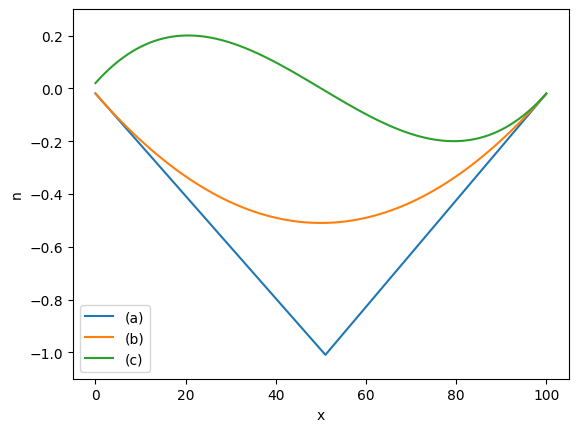

In [60]:
plt.plot(derivadas[0], label="(a)")
plt.plot(derivadas[1], label="(b)")
plt.plot(derivadas[2], label="(c)")
plt.legend(loc='lower left')
plt.ylim([-1.1, 0.30])
plt.xlabel('x')
plt.ylabel('n')
plt.savefig("graficos/laplaciana.svg");
plt.show()

## Difusión

Con alpha 1


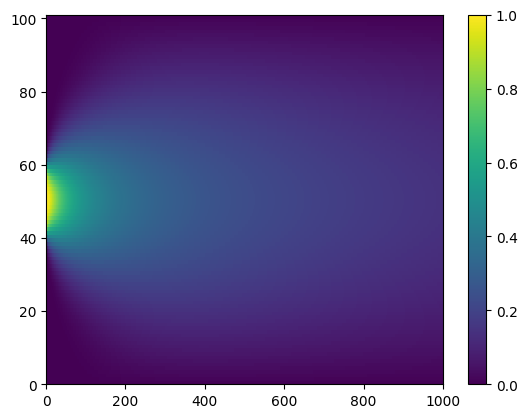

Con alpha 0.1


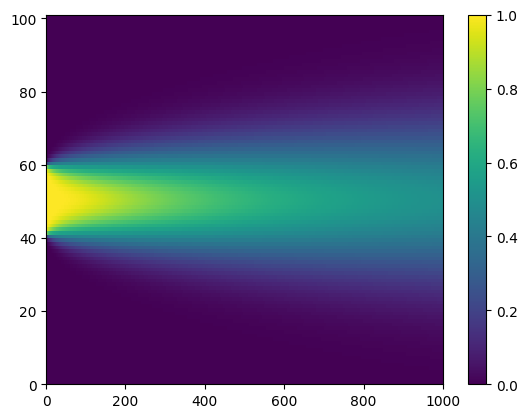

Con alpha 10


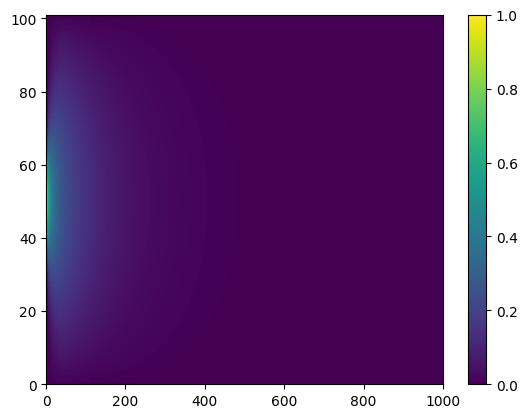

In [61]:
def difusion(alpha, n, r, m):
    a = np.full(n, -1 * alpha, dtype=float)
    b = np.full(n, 2 * alpha + 1, dtype=float)
    c = np.full(n, -1 * alpha, dtype=float)

    _, b_pre_res, c_pre_res, d_precomputo = precomputo_eliminacion_gaussiana_tridiagonal(a,b,c)

    u = np.empty((m,n))

    u_0 = np.zeros(n, dtype=float)
    middle = floor(n/2)
    for i in range(middle - r + 1, middle + r):
        u_0[i] = 1

    u[0] = u_0

    for i in range(m - 1):
        u[i+1] = (sustitucion_hacia_atras_con_precomputo(b_pre_res, c_pre_res, d_precomputo, u[i]))[0]

    return u

n = 101
r = 10
m = 1000

for alpha in [1, 0.1, 10]:
    difusion(alpha,n,r,m).T
    print('Con alpha {}'.format(alpha))
    plt.pcolor(difusion(alpha,n,r,m).T)
    plt.colorbar()
    plt.savefig(F"graficos/difusion-{alpha}.png")
    plt.show()

### Instancias de Prueba de los algoritmos

#### Gauss Tri-diagonal tradicional

In [62]:
a = np.array([ 0.0, 3.0, 6.0, 9.0, 12.0])
b = np.array([ 1.0, 4.0, 7.0, 10.0, 13.0])
c = np.array([ 2.0, 5.0, 8.0, 11.0, 0.0])
d = np.array([ 1.0, 2.0, 3.0, 4.0, 5.0 ])

In [63]:
a_res, b_res, c_res, d_res = eliminacion_gaussiana_tridiagonal(a, b, c, d)
x = (sustitucion_hacia_atras(b_res, c_res, d_res))[0]
print(x)

0.12244897959183676


#### Gauss Tri-diagonal con pre-computo

In [64]:
a_pre_res, b_pre_res, c_pre_res, d_precomputo = precomputo_eliminacion_gaussiana_tridiagonal(a, b, c)
x_pre = (sustitucion_hacia_atras_con_precomputo(b_pre_res, c_pre_res, d_precomputo, d))[0]
print(x_pre)

[ 0.12244898  0.43877551 -0.0244898   0.06734694  0.32244898]


#### Eliminación Gausseana Con y Sin Pivoteo

In [65]:
A = np.array([
    [1,1],
    [1,2]
])

b = np.array([3,2])

print(eliminacion_gaussiana_SP(A, b))

[ 4. -1.]


In [66]:
A = np.array([
    [2, 1, -1, 3],
    [-2, 0, 0, 0],
    [4, 1, -2, 4],
    [-6, -1, 2, -3]
])

b = np.array([13, -2, 24, -10])

res = eliminacion_gaussiana_SP(np.copy(A), np.copy(b))
print(res)

assert(np.allclose(np.dot(A, res), b))

[  1. -30.   7.  16.]


A continuación una prueba para una matriz de floats

In [67]:
A = np.array([
    [2., 1., -1., 3.],
    [-2., 0., 0., 0.],
    [4., 1., -2., 4.],
    [-6., -1., 2., -3.]
])

b = np.array([13., -2., 24., -10])

res = (eliminacion_gaussiana_CP(np.copy(A), np.copy(b)))[0]
print(res)


assert(np.allclose(np.dot(A, res), b))

[  1. -30.   7.  16.]


In [68]:
def test_eg_cp(A,b):
    EG = (eliminacion_gaussiana_CP(A, b))[0]
    print(EG)
    print(np.linalg.solve(A,b))
    assert(np.allclose(EG, np.linalg.solve(A,b)))
    print("\n")

# Sin triangular - Decimales chicos
A = np.array([[0.0000000000000002,1,-1,3], [2,0.0000000000000002,0,0], [4,1,-2,4], [-6,-1,2,-3]], dtype="f")
b = np.array([13,-2,24,-10], dtype="f")
test_eg_cp(A,b)

# Sin triangular
A = np.array([[2,1,-1,3], [-2,0,0,0], [4,1,-2,4], [-6,-1,2,-3]], dtype="f")
b = np.array([13,-2,24,-10], dtype="f")
test_eg_cp(A,b)

# Elementos con decimales
A = np.array([[1,eps,-1,3], [-2,eps,0,0], [4,1,eps,4], [-6,-1,2,eps]], dtype="f")
b = np.array([13,-2,24,-10], dtype="f")
test_eg_cp(A,b)

# Elementos con decimales
A = np.array([[0,2,6,4], [4,6,1,5], [2,3,6,4], [6,8,-7,2]], dtype="f")
b = np.array([1,1,1,1], dtype="f")
test_eg_cp(A,b)

/tmp/ipykernel_6974/572586751.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "eliminacion_gaussiana_CP" failed type inference due to: Unknown attribute 'time' of type Module(<module 'time' (built-in)>)

File "../../../../../../../tmp/ipykernel_6974/572586751.py", line 5:
<source missing, REPL/exec in use?>

During: typing of get attribute at /tmp/ipykernel_6974/572586751.py (5)

File "../../../../../../../tmp/ipykernel_6974/572586751.py", line 5:
<source missing, REPL/exec in use?>

  @jit
/tmp/ipykernel_6974/572586751.py:1: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "eliminacion_gaussiana_CP" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "../../../../../../../tmp/ipykernel_6974/572586751.py", line 7:
<source missing, REPL/exec in use?>

  @jit
/home/matias/.local/lib/python3.11/site-packages/numba/core/ob

[ -1. -26.  -3.  12.]
[ -1. -26.  -3.  12.]


[  1. -30.   7.  16.]
[  1. -30.   7.  16.]


[1. 4. 0. 4.]
[1.0000000e+00 4.0000000e+00 2.5757174e-14 4.0000000e+00]


[-0.26136368  0.52272728  0.15909089 -0.24999997]
[-0.26136363  0.52272725  0.1590909  -0.25      ]


